# 라이브러리

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# 나눔고딕 폰트 다운로드 및 설치
!apt-get install -y fonts-nanum
!fc-cache -fv
!rm ~/.cache/matplotlib -rf

# 나눔고딕 폰트 설정
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font = fm.FontProperties(fname=font_path).get_name()
plt.rc('font', family=font)

# 한글 폰트가 잘 설정되었는지 확인
print(f'Current font: {font}')

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

# 경기수 평균 조건 없는 상관관계

In [ ]:
df1 = pd.read_csv("/content/drive/MyDrive/DATATHON/data/@KBO_5개구단/KBO_top5_hitter.csv", encoding='cp949')
df2 = pd.read_csv("/content/drive/MyDrive/DATATHON/data/@KBO_5개구단/KBO_top5_hitter_detail.csv", encoding='cp949')
df3 = pd.read_csv("/content/drive/MyDrive/DATATHON/data/@KBO_5개구단/KBO_top5_batting_order.csv", encoding='cp949')
df4 = pd.read_csv("/content/drive/MyDrive/DATATHON/data/@KBO_5개구단/KBO_top5_runner.csv", encoding='cp949')
df5 = pd.read_csv("/content/drive/MyDrive/DATATHON/data/@KBO_5개구단/KBO_top5_defense.csv", encoding='cp949')

In [ ]:
# print(df1.columns) #출루율, 장타율, 타율, 득점권 타율
# print(df2.columns)
# print(df3.columns)
# print(df4.columns) #도루성공률, 도루 허용
# print(df5.columns) #수비 승리 기여도

In [ ]:
df2.columns

Index(['Unnamed: 0', '선수명', '팀명', '타율', '장타', '땅볼', '뜬공', '땅볼/뜬공', '결승타',
       '볼넷/삼진', '투구수/타석', '순수장타율', '추정득점', '(1.8x출루율+장타율)/4', '년도'],
      dtype='object')

/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


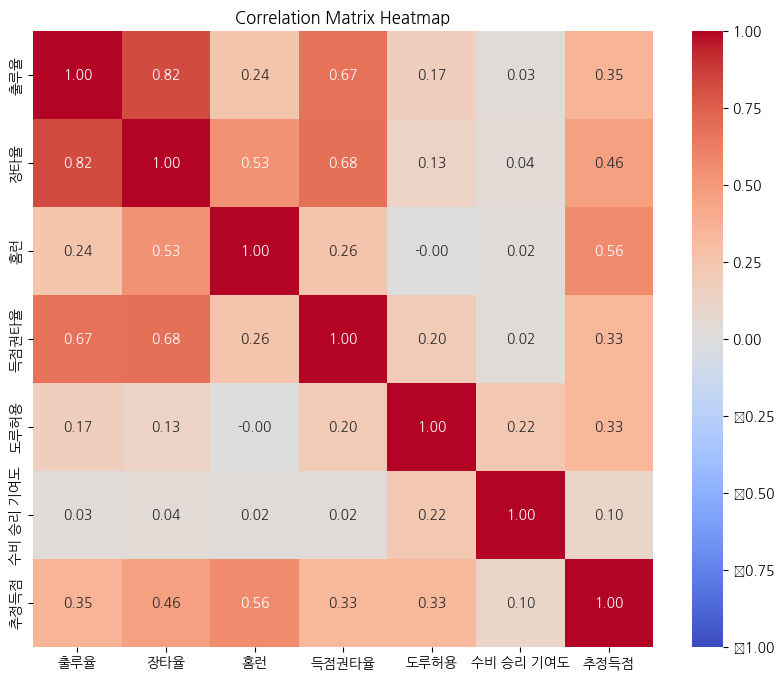

In [ ]:
# 필요한 열 선택
df1_selected = df1[['선수명', '팀명', '출루율', '장타율',  '홈런', '득점권타율']]
df2_selected = df2[['선수명', '팀명', '추정득점']]
df4_selected = df4[['선수명', '팀명', '도루허용']]
df5_selected = df5[['선수명', '팀명', '수비 승리 기여도']]

# 데이터 병합 (선수명과 팀명을 기준으로 병합)
merged_df = pd.merge(df1_selected, df2_selected, on=['선수명', '팀명'], how='inner')
merged_df = pd.merge(merged_df, df4_selected, on=['선수명', '팀명'], how='inner')
merged_df = pd.merge(merged_df, df5_selected, on=['선수명', '팀명'], how='inner')

# '-'을 NaN으로 변환
merged_df.replace('-', np.nan, inplace=True)

# 숫자형 컬럼으로 변환
cols_to_convert = ['출루율', '장타율', '홈런', '득점권타율', '도루허용', '수비 승리 기여도', '추정득점']
merged_df[cols_to_convert] = merged_df[cols_to_convert].apply(pd.to_numeric)

# NaN 값 제거
merged_df.dropna(subset=cols_to_convert, inplace=True)

# 상관관계 계산
correlation_matrix = merged_df[cols_to_convert].corr()

# 히트맵 출력
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()

득점과 상관관계가 높은 순서대로
: 장타율, 출루율, 타율, 득점권 타율, 도루허용, 수비승리 기여도

- 1번타자 지표 : 출루율, 도루허용 (상관계수 평균 : (0.52+0.42)/2 = 0.47)
- 2번타자 지표 : 출루율, 장타율, 도루허용 (상관계수 평균 : (0.52+0.54+0.42)/3 = 0.49)
- 중심타선 지표 : 장타율, 득점권타율 (상관계수 평균 : (0.54+0.45)/2 = 0.495)
- 하위타선 지표 : 출루율, 수비승리기여도 (상관계수 평균 : (0.52+0.22)/2 = 0.37)


중심타선-2번타자-1번타자-하위타선 순으로 배치